In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00


In [37]:
! pip install streamlit -q


In [38]:
!wget -q -O - ipv4.icanhazip.com


34.74.143.85


In [39]:
! streamlit run Segmentation.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.143.85:8501

npx: installed 22 in 4.986s
your url is: https://orange-pens-hang.loca.lt
2024-05-14 18:34:54.247468: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 18:34:54.247545: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 18:34:54.249613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 18:34:56.482925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Could not find image proces

In [ ]:
import streamlit as st
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from transformers import AutoImageProcessor, SegformerForSemanticSegmentation

# Set up the Streamlit app
st.title("Optic Disc and Cup Segmentation")
st.write("Upload an image to segment the optic disc and cup:")

# Create a file uploader
uploaded_file = st.file_uploader("Choose an image", type=["png", "jpg", "jpeg"])

# Load the processor and model
processor = AutoImageProcessor.from_pretrained("pamixsun/segformer_for_optic_disc_cup_segmentation")
model = SegformerForSemanticSegmentation.from_pretrained("pamixsun/segformer_for_optic_disc_cup_segmentation")

# Define a function to process the image
def process_image(image):
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the input image
    inputs = processor(image, return_tensors="pt")

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits.cpu()

    # Upsample the logits to match the input image size
    upsampled_logits = nn.functional.interpolate(
        logits,
        size=image.shape[:2],
        mode="bilinear",
        align_corners=False,
    )

    # Get the predicted segmentation
    pred_disc_cup = upsampled_logits.argmax(dim=1)[0].numpy().astype(np.uint8)

    # Display the input image and the segmented output
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image)
    axes[0].set_title('Input Image')
    axes[0].axis('off')
    axes[1].imshow(pred_disc_cup, cmap='gray')
    axes[1].set_title('Segmented Output')
    axes[1].axis('off')
    plt.tight_layout()
    return fig

# Display the output
if uploaded_file:
    image = cv2.imdecode(np.frombuffer(uploaded_file.read(), np.uint8), cv2.IMREAD_COLOR)
    output_fig = process_image(image)
    st.pyplot(output_fig)

2024-05-14 09:59:35.755 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [ ]:
!pip install tifffile


In [29]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import jaccard_score
from skimage import morphology
from transformers import AutoImageProcessor, SegformerForSemanticSegmentation
from torch import nn
import tifffile


In [30]:

# Set the paths to the input image and original result picture
input_image_path = "/content/4.png"
original_result_path = "/content/4.tif"


In [31]:

# Load the input image
input_image = cv2.imread(input_image_path)
if input_image is None:
    raise FileNotFoundError(f"Unable to load input image from path: {input_image_path}")

# Load the original result picture
try:
    original_result_image = tifffile.imread(original_result_path)
except Exception as e:
    raise IOError(f"Error loading original result image: {e}")


In [32]:

# Load the processor and model
processor = AutoImageProcessor.from_pretrained("pamixsun/segformer_for_optic_disc_cup_segmentation")
model = SegformerForSemanticSegmentation.from_pretrained("pamixsun/segformer_for_optic_disc_cup_segmentation")


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:103: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [33]:

# Define a function to process the image
def process_image(image):
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the input image
    inputs = processor(image, return_tensors="pt")

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits.cpu()

    # Upsample the logits to match the input image size
    upsampled_logits = nn.functional.interpolate(
        logits,
        size=image.shape[:2],
        mode="bilinear",
        align_corners=False,
    )

    # Get the predicted segmentation
    pred_disc_cup = upsampled_logits.argmax(dim=1)[0].numpy().astype(np.uint8)

    return pred_disc_cup


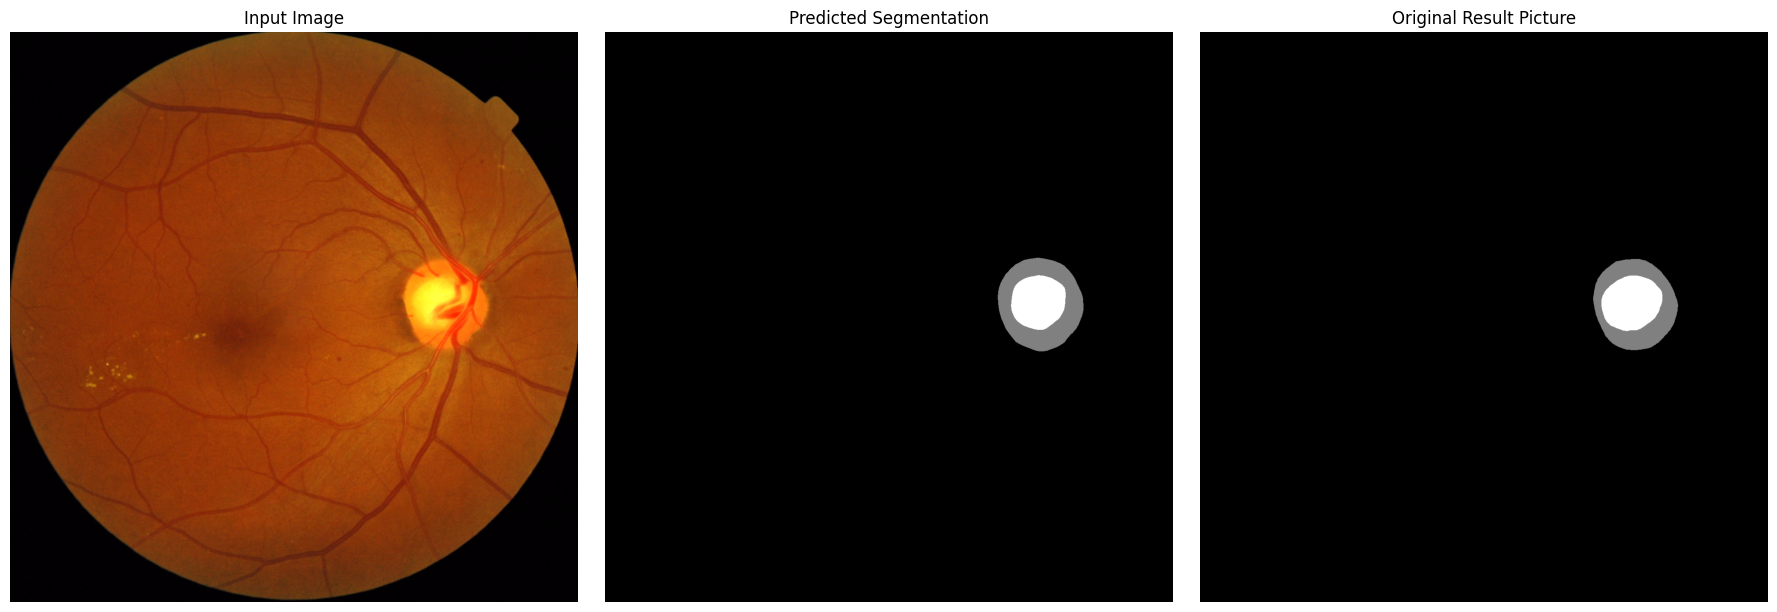

In [34]:

# Process the input image
pred_disc_cup = process_image(input_image)

# Display the input image, predicted segmentation, and original result picture
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Input Image')
axes[0].axis('off')
axes[1].imshow(pred_disc_cup, cmap='gray')
axes[1].set_title('Predicted Segmentation')
axes[1].axis('off')
axes[2].imshow(original_result_image, cmap='gray')
axes[2].set_title('Original Result Picture')
axes[2].axis('off')
plt.tight_layout()
plt.show()


In [35]:

# Calculate evaluation metrics
original_result_binary = original_result_image

# Binarize the original result picture
original_result_binary[original_result_binary > 0] = 1

# Flatten the arrays for calculating metrics
pred_flat = pred_disc_cup.flatten()
original_flat = original_result_binary.flatten()



In [36]:

# Calculate metrics
accuracy = accuracy_score(original_flat, pred_flat)
precision = precision_score(original_flat, pred_flat, average='macro')
recall = recall_score(original_flat, pred_flat, average='macro')
iou = jaccard_score(original_flat, pred_flat, average='macro')

# Calculate Cup-to-Disc Ratio (CDR)
disc_pixels = np.sum(original_result_binary == 1)
cup_pixels = np.sum(pred_disc_cup == 1)
cdr = cup_pixels / disc_pixels

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Intersection over Union (IoU): {iou}")
print(f"Cup-to-Disc Ratio (CDR): {cdr}")

# Compare calculated CDR with established clinical criteria for glaucoma diagnosis
if cdr > 0.7:
    print("The calculated CDR suggests a high likelihood of glaucoma.")
elif cdr < 0.3:
    print("The calculated CDR suggests a low likelihood of glaucoma.")
else:
    print("The calculated CDR suggests a moderate likelihood of glaucoma.")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Metrics:
Accuracy: 0.9919316022933523
Precision: 0.6463947698420411
Recall: 0.5335819871083894
Intersection over Union (IoU): 0.5260552669090076
Cup-to-Disc Ratio (CDR): 0.6403896999655133
The calculated CDR suggests a moderate likelihood of glaucoma.
